In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

# Multi-Factor Models

La idea es explicar excesos de retorno sobre el RF de un portfolio o activo usando uno o más factores (features). Estos factores de riesgo pueden considerarse una herramienta para entender el cross-section de retornos esperados.

En general, estos modelos de factores pueden usarse para identificar activos interesantes that puedan ser añadidos al portfolio de inversión, lo que lleva a un mejor rendimiento del portfolio.



## Implementing the CAPM in Python

El modelo representa la relación entre el retorno esperado en un activo de riesgo y el riesgo de mercado (conocido como systematic o riesgo no diversificable)

CAPM se representa por la siguiente ecuación: 

E(ri) = rf + B(E(Rm) -rf)

con E(ri) : expected return over ri 
rf: risk free asset ( gov bond)
B = beta coeff

B puede ser interpretado como el nivel de sensibilidad de los retornos del activo comparados con el mercado en general. 

B = cov(Ri,Rm)/var(Rm)


En estos ejemplos, consideramos el caso de Amazon y asumimos que el S&P index representa el mercado. Usamos 5 años (14-18) de datos mensuales para estimar B. Actualmente, el RF es tan bajo, que podemos asumir que es 0. En próximos ejemplos dejaremos de asumir esto. 

### How to do it...

1. Import the libraries:

In [19]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

2. Specify the risky asset and the time horizon:

In [20]:
RISKY_ASSET = 'AMZN'
MARKET_BENCHMARK = '^GSPC'
START_DATE = '2014-01-01'
END_DATE = '2018-12-31'

3. Download data from Yahoo Finance:

In [21]:
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 progress=False)

print(f'Downloaded {df.shape[0]} rows of data.')

Downloaded 1257 rows of data.


In [25]:
a=df.resample('M').last()
a.head()

Adj Close                   Close                    High  \
                 AMZN        ^GSPC       AMZN        ^GSPC       AMZN   
Date                                                                    
2014-01-31  17.934500  1782.589966  17.934500  1782.589966  18.772499   
2014-02-28  18.105000  1859.449951  18.105000  1859.449951  18.293501   
2014-03-31  16.818501  1872.339966  16.818501  1872.339966  17.314501   
2014-04-30  15.206500  1883.949951  15.206500  1883.949951  15.228000   
2014-05-31  15.627500  1923.569946  15.627500  1923.569946  15.732500   

                               Low                    Open               \
                  ^GSPC       AMZN        ^GSPC       AMZN        ^GSPC   
Date                                                                      
2014-01-31  1793.880005  17.888000  1772.260010  18.587999  1790.880005   
2014-02-28  1867.920044  17.854000  1847.670044  18.030001  1855.119995   
2014-03-31  1875.180054  16.702999  1859.160034  17.120001  1859.160034   
2014-04-30  1885.199951  14.905000  1872.689941  14.905000  1877.099976   
2014-05-31  1924.030029  15.378500  1916.640015  15.721500  1920.329956   

               Volume              
                 AMZN       ^GSPC  
Date                               
2014-01-31  323096000  4059690000  
2014-02-28   77640000  3917450000  
2014-03-31   85950000  3274300000  
2014-04-30   81772000  3779230000  
2014-05-31   85204000  3263490000

4. Resample to monthly data and calculate simple returns:

In [8]:
X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset', 
                                    MARKET_BENCHMARK: 'market'}) \
                   .resample('M') \
                   .last() \
                   .pct_change() \
                   .dropna()
X.head()

,asset,market
Date,,
2014-02-28,0.009507,0.043117
2014-03-31,-0.071058,0.006932
2014-04-30,-0.095847,0.006201
2014-05-31,0.027685,0.021030
2014-06-30,0.039130,0.019058


5. Calculate beta using the covariance approach: 

In [15]:
X.cov()

,asset,market
asset,0.007302,0.001636
market,0.001636,0.001004


In [7]:
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance
beta

1.6709212115173373

6. Prepare the input and estimate CAPM as a linear regression:

In [18]:
X

,const,market
Date,,
2014-02-28,1.0,0.043117
2014-03-31,1.0,0.006932
2014-04-30,1.0,0.006201
2014-05-31,1.0,0.021030
2014-06-30,1.0,0.019058
2014-07-31,1.0,-0.015080
2014-08-31,1.0,0.037655
2014-09-30,1.0,-0.015514
2014-10-31,1.0,0.023201


La idea de meter una constante es comprobar si esa constante es positiva y significativa. Si lo es, hay retornos superiores al benchmark. 


Calculamos B haciendo fit al modelo, usando y y X.

In [27]:
y.head()

Date
2014-02-28    0.009507
2014-03-31   -0.071058
2014-04-30   -0.095847
2014-05-31    0.027685
2014-06-30    0.039130
Freq: M, Name: asset, dtype: float64

In [16]:
# separate target
y = X.pop('asset')

# add constant
X = sm.add_constant(X)

# define and fit the regression model 
capm_model = sm.OLS(y, X).fit()

# print results 
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     32.77
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           4.05e-07
Time:                        14:59:58   Log-Likelihood:                 75.313
No. Observations:                  59   AIC:                            -146.6
Df Residuals:                      57   BIC:                            -142.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0178      0.009      1.950      0.0

Vemos como la B del cálculo cov(Ri, Rm)/var(Rm) es la misma que el coef sacado por el modelo OLS. 

### There's more...

En el modelo anterior, hemos asumido que no había Rf (debido a los bajos rf existentes, que han cambiado según escribo esto). 

Para incorporar Rf, metemos los datos del profesor Jenneth French (el del modelo) de su página. 

Podemos descargar el market premium (Rm-rf) y el rf (aproximado como T-bill de 1 mes) 

Hay que tener en cuenta que la definición de market benchmark no es el S&P500.


La otra opción es aproximar el rf con 13 weeks (3 moses) de T-bill (en yahoo como ^IRX)

#### Risk-free rate (13 Week Treasury Bill)

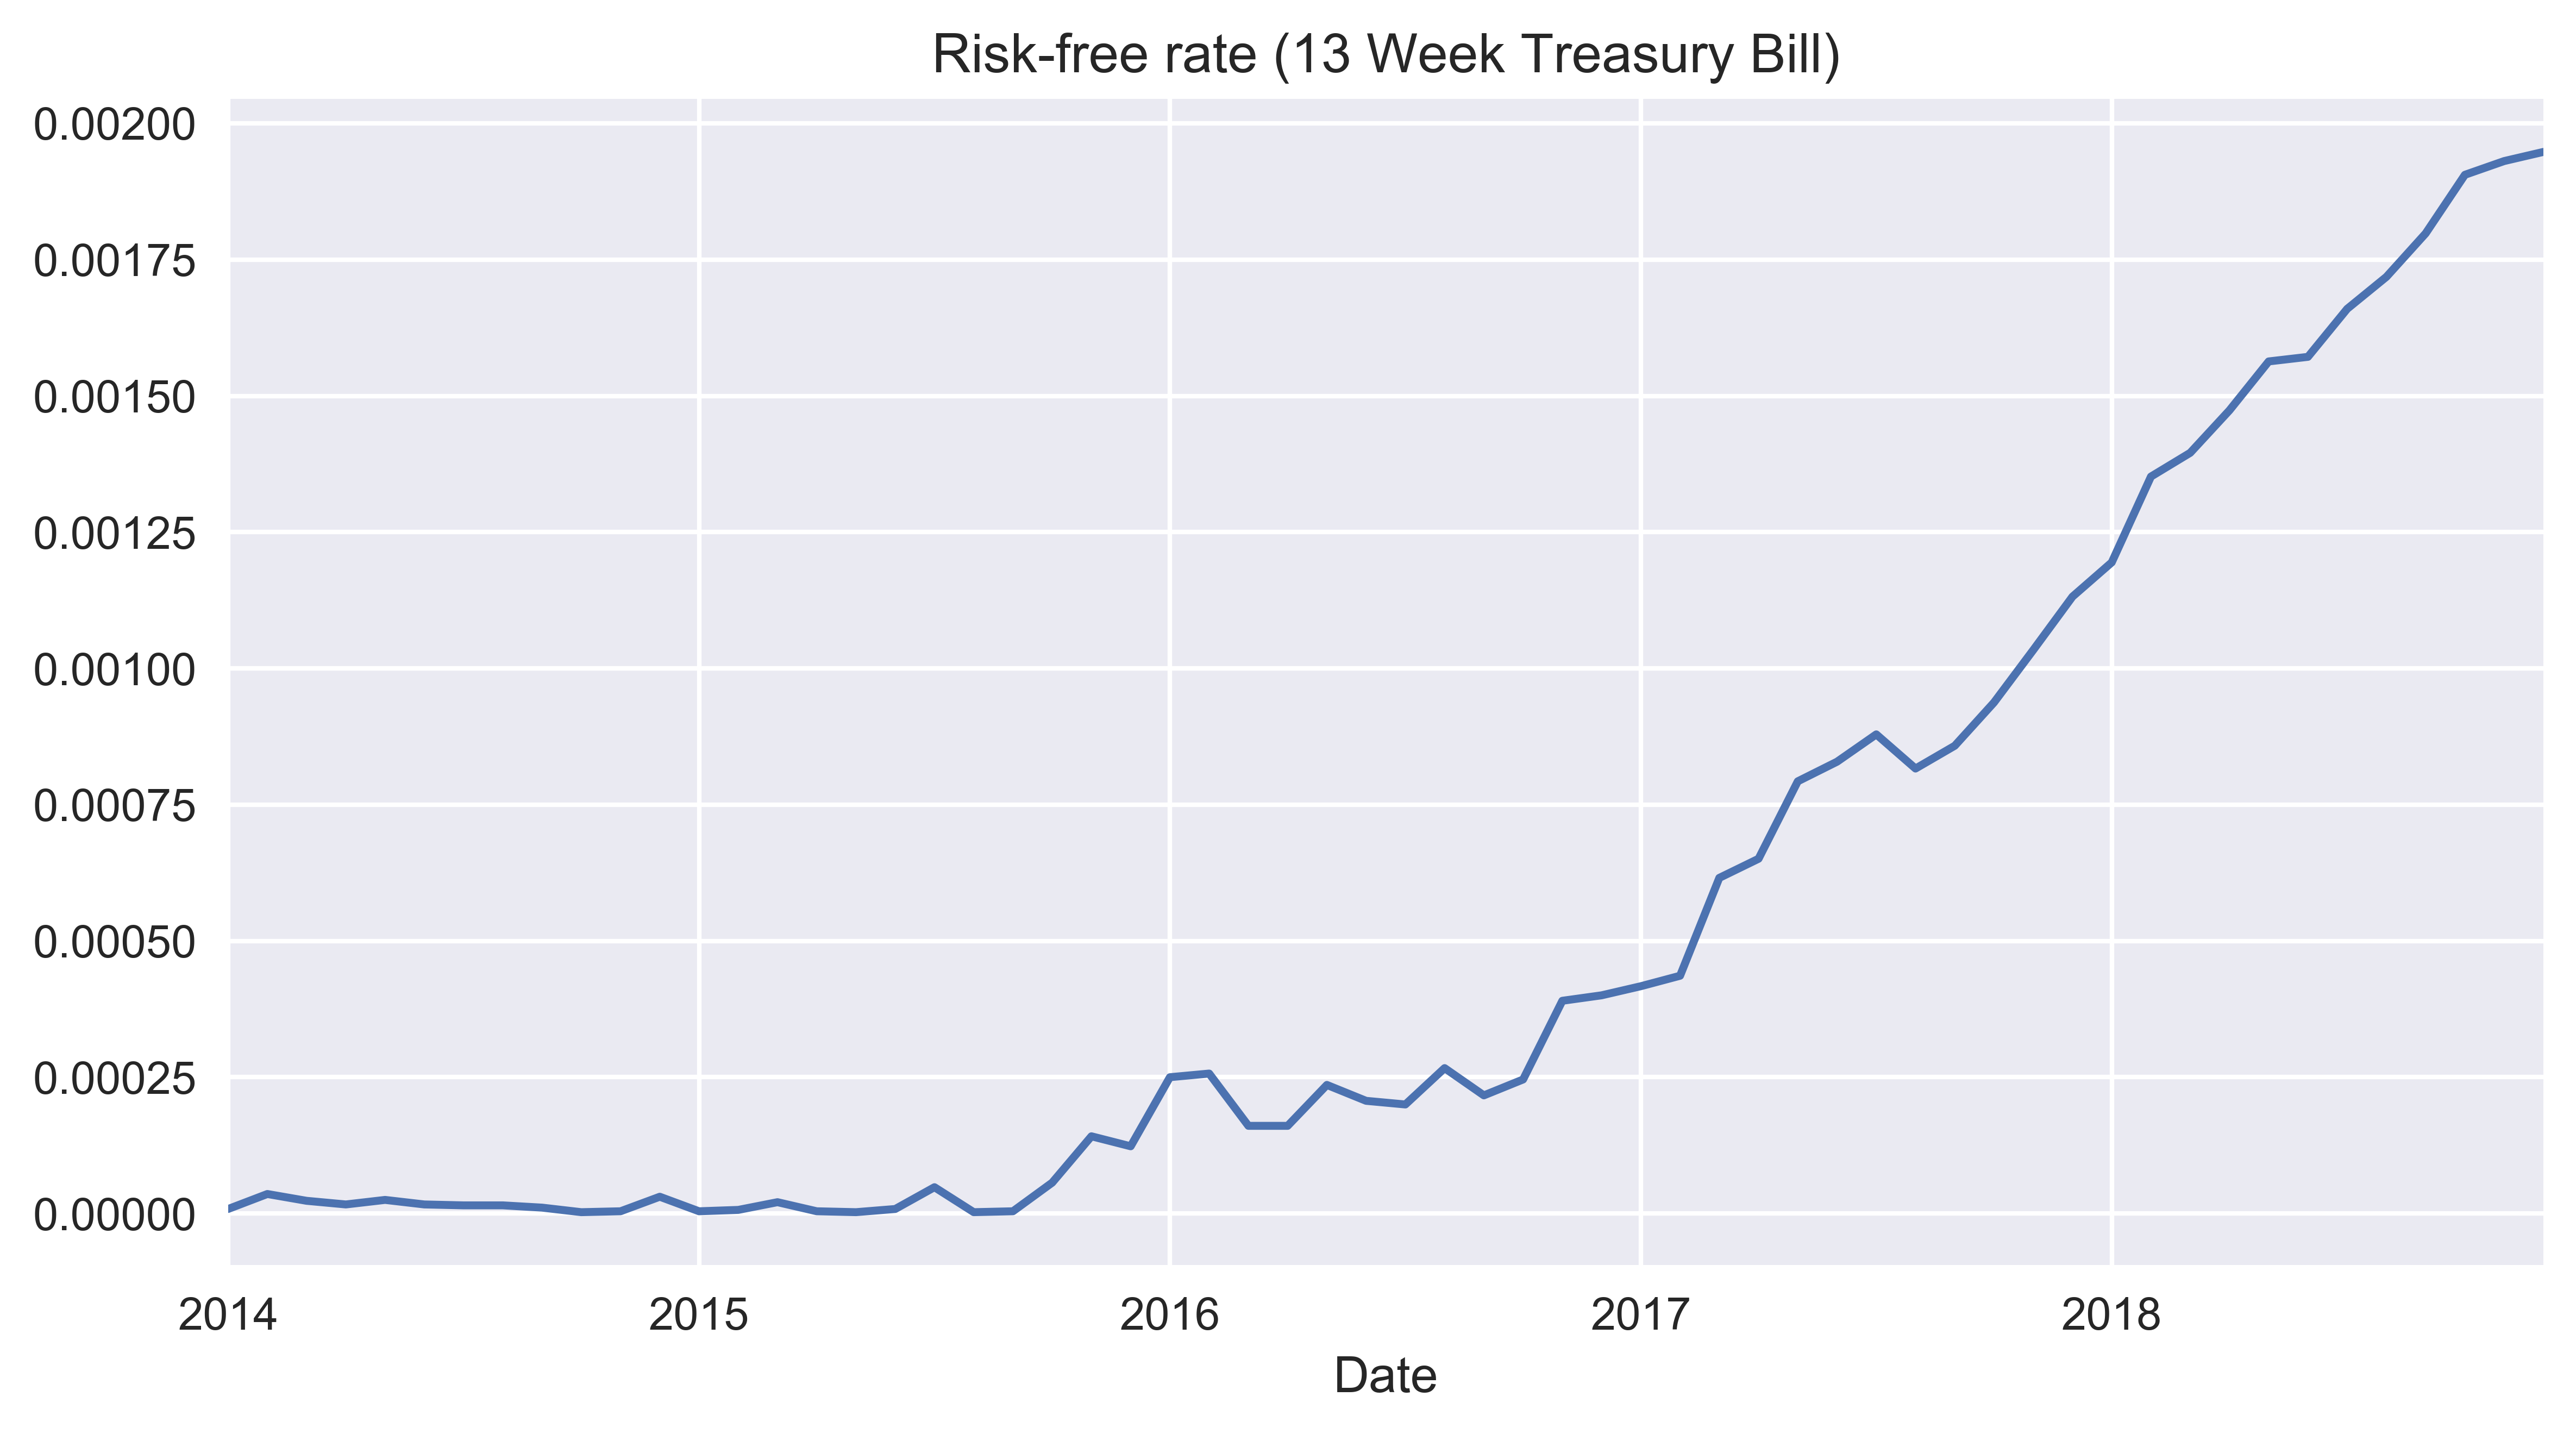

In [28]:
# period lenght in days
N_DAYS = 90

# download data from Yahoo finance
df_rf = yf.download('^IRX',
                    start=START_DATE,
                    end=END_DATE,
                    progress=False)

# resample to monthly by taking last value from each month
rf = df_rf.resample('M').last().Close / 100

# calculate the corresponding daily risk-free return  
rf = ( 1 / (1 - rf * N_DAYS / 360) )**(1 / N_DAYS)  

# convert to monthly and subtract 1
rf = (rf ** 30) - 1 

# plot the risk-free rate
rf.plot(title='Risk-free rate (13 Week Treasury Bill)')

plt.tight_layout()
# plt.savefig('images/ch4_im2.png')
plt.show()

#### Risk-free rate (3-Month Treasury Bill)

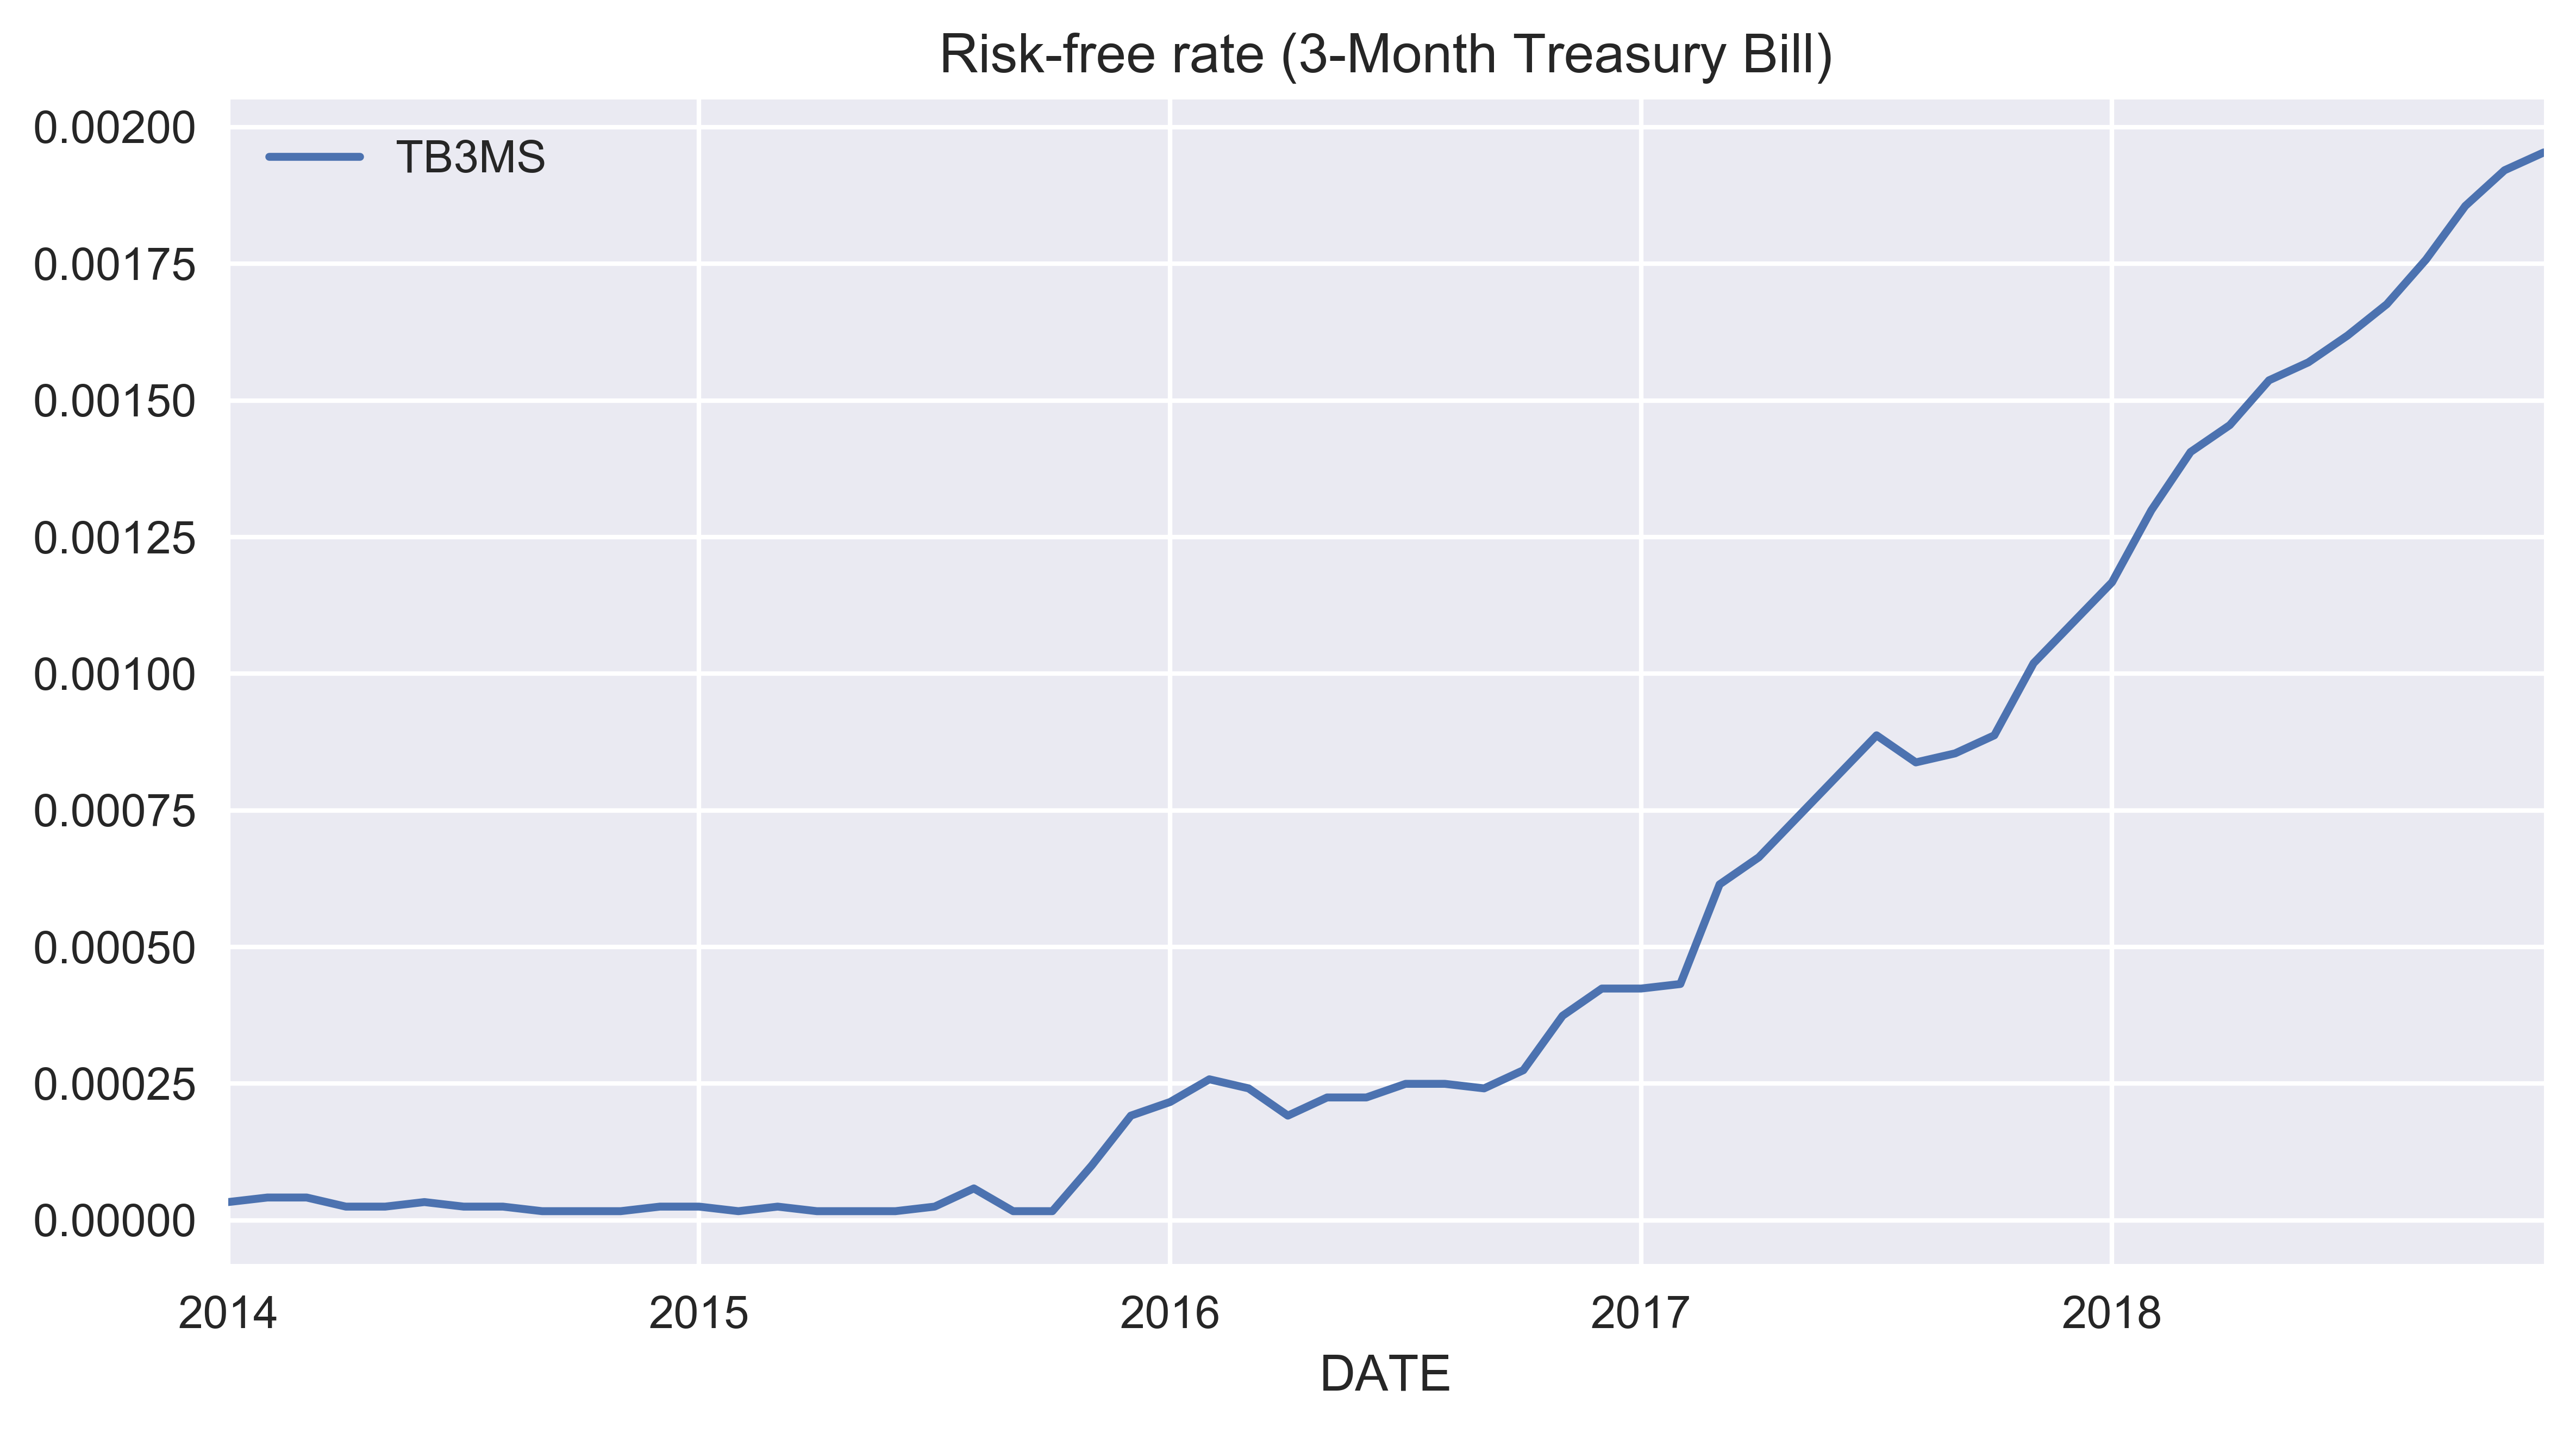

In [10]:
import pandas_datareader.data as web

# download the data 
rf = web.DataReader('TB3MS', 'fred', start=START_DATE, end=END_DATE)

# convert to monthly
rf = (1 + (rf / 100)) ** (1 / 12) - 1

# plot the risk-free rate
rf.plot(title='Risk-free rate (3-Month Treasury Bill)')

plt.tight_layout()
# plt.savefig('images/ch4_im3.png')
plt.show()

## Implementing the Fama-French three-factor model in Python

En el paper de fama an french, expanden el modelo de CAPM añadiendo 2 factores adicionales que explican los retornos de un activo o portfolio. 

- el market factor  (el del capm)
- size factor (mide los excesos de stock  de small caps respecto a large markets caps)
- value factor, HML exceso de retorno de value sobre growth

El modelo puede ser representado por 
E(ri) =rf + a + Bmkt(E(rm)-rf) + Bsmb*SMB + Bhml*HML

En el caso de a, es el intercept. Se incluye para comprobar que es diferente de 0 (estadísticamente). Si no lo es, puede que el modelo no esté evaluando correctamente los retornos del activo (o portfolio). 

Sin embargo, los autores en su paper dicen que no pasa nada, aunque no pase el test. 


### How to do it...

1. Import the libraries:

In [29]:
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf

2. Download data from prof. French's website:

In [30]:
# download the zip file from Prof. French's website
!wget http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip

# unpack the zip
!unzip -a F-F_Research_Data_Factors_CSV.zip

# remove the zip
!rm F-F_Research_Data_Factors_CSV.zip

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [31]:
import urllib.request
url = 'http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip'
filename = 'F-F_Research_Data_Factors_CSV.zip'
urllib.request.urlretrieve(url, filename)

('F-F_Research_Data_Factors_CSV.zip',
 <http.client.HTTPMessage at 0x1805538d408>)

3. Define parameters:

In [49]:
RISKY_ASSET = 'META'
START_DATE = '2013-12-31'
END_DATE = '2018-12-31'

4. Load data from the source CSV file and keep only the monthly data:

In [43]:
# load data from csv
factor_df = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows=3)

# identify where the annual data starts
STR_TO_MATCH = ' Annual Factors: January-December '
indices = factor_df.iloc[:, 0] == STR_TO_MATCH
start_of_annual = factor_df[indices].index[0]

# keep only monthly data
factor_df = factor_df[factor_df.index < start_of_annual]

In [44]:
factor_df.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.30,-2.87,0.22
1,192608,2.64,-1.40,4.19,0.25
2,192609,0.36,-1.32,0.01,0.23
3,192610,-3.24,0.04,0.51,0.32
4,192611,2.53,-0.20,-0.35,0.31


5. Rename columns of the DataFrame, set a datetime index and filter by dates:

In [45]:
# rename columns
factor_df.columns = ['date', 'mkt', 'smb', 'hml', 'rf']

# convert strings to datetime
factor_df['date'] = pd.to_datetime(factor_df['date'], 
                                   format='%Y%m') \
                      .dt.strftime("%Y-%m")

# set index
factor_df = factor_df.set_index('date')

# filter only required dates
factor_df = factor_df.loc[START_DATE:END_DATE]
factor_df.head()

,mkt,smb,hml,rf
date,,,,
2014-01,-3.32,0.85,-2.09,0.00
2014-02,4.65,0.34,-0.40,0.00
2014-03,0.43,-1.89,5.09,0.00
2014-04,-0.19,-4.24,1.14,0.00
2014-05,2.06,-1.86,-0.27,0.00


6. Convert the values to numeric and divide by 100:

In [46]:
factor_df = factor_df.apply(pd.to_numeric, 
                            errors='coerce') \
                     .div(100)
factor_df.head()

,mkt,smb,hml,rf
date,,,,
2014-01,-0.0332,0.0085,-0.0209,0.0
2014-02,0.0465,0.0034,-0.0040,0.0
2014-03,0.0043,-0.0189,0.0509,0.0
2014-04,-0.0019,-0.0424,0.0114,0.0
2014-05,0.0206,-0.0186,-0.0027,0.0


7. Download the prices of the risky asset:

In [50]:
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')

Downloaded 1258 rows of data.


8. Calculate monthly returns on the risky asset:

In [51]:
y = asset_df['Adj Close'].resample('M') \
                         .last() \
                         .pct_change() \
                         .dropna()

y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
y.head()

Date
2014-01    0.144922
2014-02    0.094135
2014-03   -0.120070
2014-04   -0.007636
2014-05    0.058883
Name: rtn, dtype: float64

9. Merge the datasets and calculate excess returns:

In [52]:
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf

10. Estimate the three-factor model:

In [53]:
# define and fit the regression model 
ff_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml', 
                   data=ff_data).fit()

# print results 
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     5.175
Date:                Wed, 04 Jan 2023   Prob (F-statistic):            0.00316
Time:                        12:26:43   Log-Likelihood:                 88.392
No. Observations:                  60   AIC:                            -168.8
Df Residuals:                      56   BIC:                            -160.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0105      0.008      1.373      0.1

tenemos que poner atención a dos cosas:
    el intecept
    cuales de los factores coinciden con la literatura o nuestras asumnciones 
    
En los resultados, vemos que el intercept es positivo pero no significativo estadísticamente. 

De los factores, solo el SMB no es significativo. 

el F-test sí parece significativo (conjunto de factores)

    

### There's more...

1. Import the libraries:

In [25]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web

2. Print available datasets (here only first 5):

In [26]:
get_available_datasets()[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

3. Download the selected dataset:

In [27]:
ff_dict = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                         start='2014-01-01')

In [28]:
ff_dict.keys()

dict_keys([0, 1, 'DESCR'])

4. Inspect the description of the dataset

In [29]:
print(ff_dict['DESCR'])

F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 201912 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2019 Kenneth R. French

  0 : (72 rows x 4 cols)
  1 : Annual Factors: January-December (6 rows x 4 cols)


5. View the monthly dataset:

In [30]:
ff_dict[0].head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2014-01,-3.32,0.85,-2.09,0.0
2014-02,4.65,0.34,-0.40,0.0
2014-03,0.43,-1.89,5.09,0.0
2014-04,-0.19,-4.24,1.14,0.0
2014-05,2.06,-1.86,-0.27,0.0


## Implementing the rolling three-factor model on a portfolio of assets

En este caso, intentamos hacer el modelo haciendo la regresión con una ventana de 60 días. 

en este cso, hacemos retornos de un portfolio (Amazon, google, Apple, y microsoft) 

Usamos stocks desde 10 hasta 18

### How to do it...

1. Import the libraries:

In [62]:
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf
import pandas_datareader.data as web
import numpy as np

2. Define the parameters:

In [56]:
ASSETS = ['AMZN', 'GOOG', 'AAPL', 'MSFT']
WEIGHTS = [0.25, 0.25, 0.25, 0.25]
START_DATE = '2009-12-31'
END_DATE = '2018-12-31'

3. Download the factor related data:

In [57]:
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                                 start=START_DATE)[0]
df_three_factor = df_three_factor.div(100)
df_three_factor.index = df_three_factor.index.format()

4. Download the prices of risky assets from Yahoo Finance:

In [59]:
asset_df = yf.download(ASSETS,
                       start=START_DATE,
                       end=END_DATE,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')

Downloaded 2264 rows of data.


5. Calculate the monthly returns on the risky assets:

In [60]:
asset_df = asset_df['Adj Close'].resample('M') \
                                .last() \
                                .pct_change() \
                                .dropna()
# reformat index for joining
asset_df.index = asset_df.index.strftime('%Y-%m')
asset_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-01,-0.088597,-0.067722,-0.145230,-0.075460
2010-02,0.065396,-0.055897,-0.005925,0.022146
2010-03,0.148470,0.146706,0.076538,0.021625
2010-04,0.111021,0.009796,-0.073036,0.042677
2010-05,-0.016124,-0.084902,-0.076222,-0.151394


6. Calculate the portfolio returns:

In [63]:
asset_df['portfolio_returns'] = np.matmul(asset_df[ASSETS].values, 
                                          WEIGHTS)
asset_df.head()

,AAPL,AMZN,GOOG,MSFT,portfolio_returns
Date,,,,,
2010-01,-0.088597,-0.067722,-0.145230,-0.075460,-0.094252
2010-02,0.065396,-0.055897,-0.005925,0.022146,0.006430
2010-03,0.148470,0.146706,0.076538,0.021625,0.098335
2010-04,0.111021,0.009796,-0.073036,0.042677,0.022615
2010-05,-0.016124,-0.084902,-0.076222,-0.151394,-0.082161


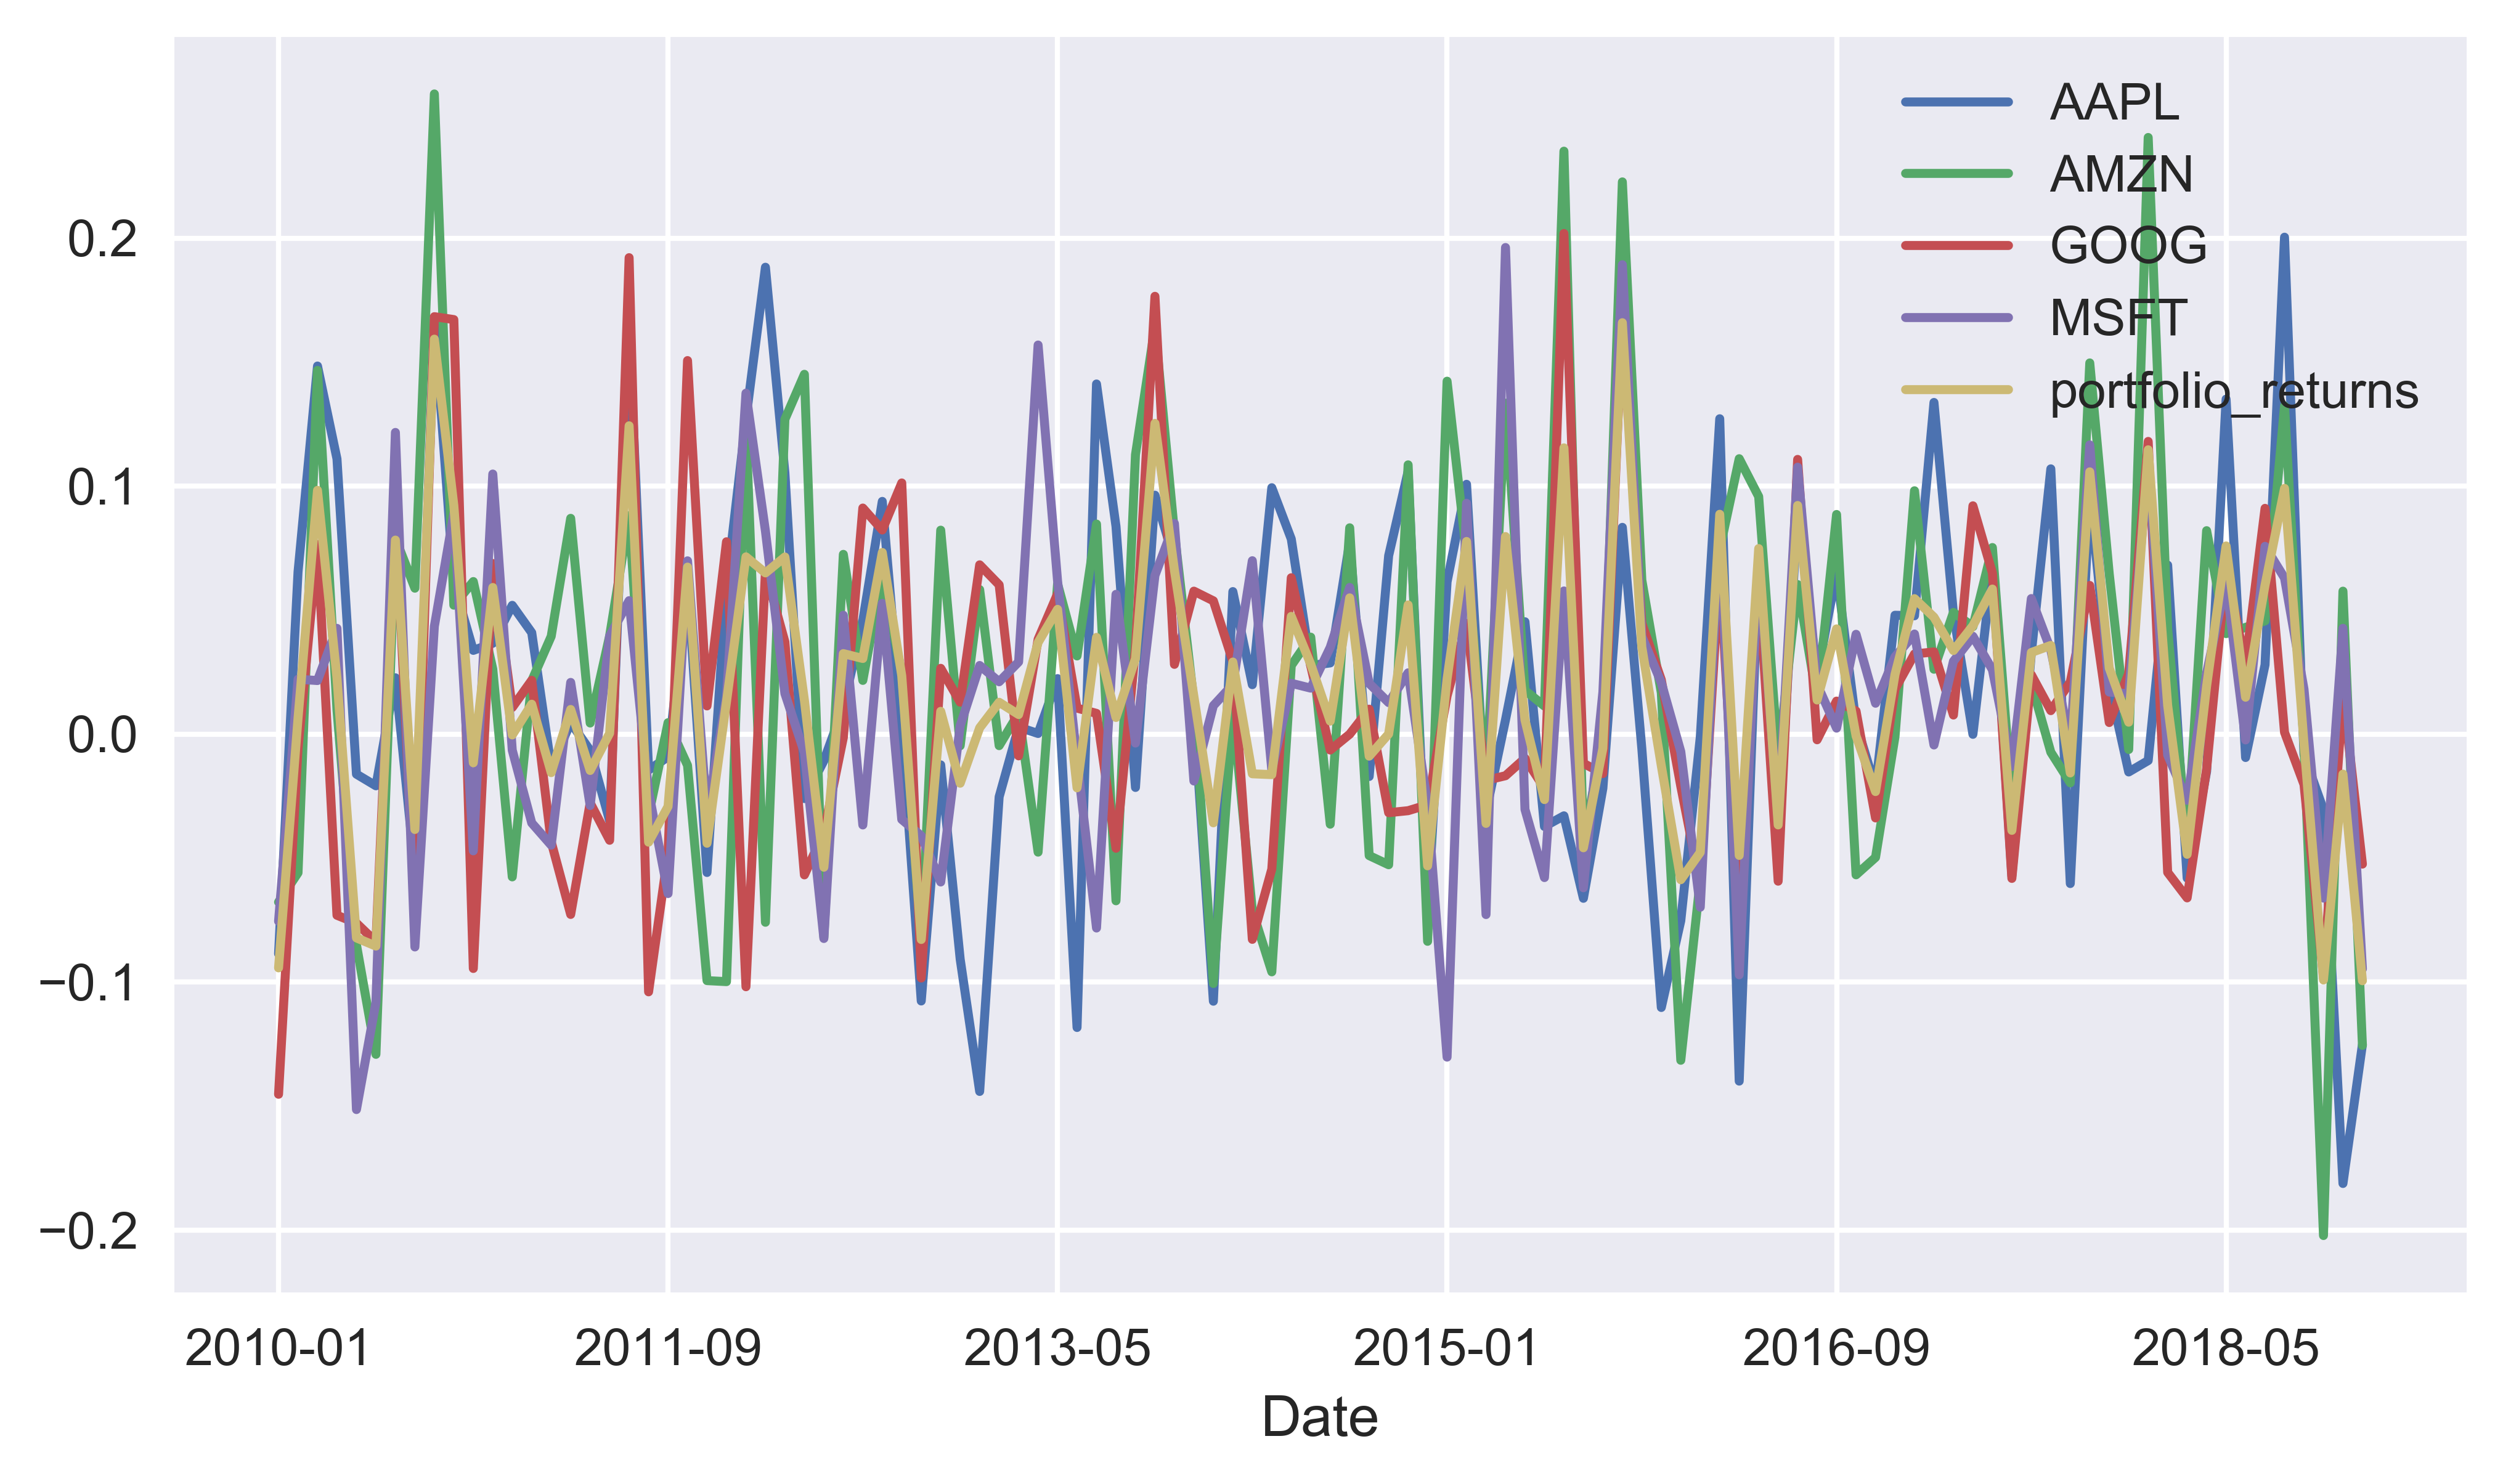

In [64]:
asset_df.plot()

7. Merge the datasets:

In [67]:
ff_data = asset_df.join(df_three_factor).drop(ASSETS, axis=1)
ff_data.columns = ['portf_rtn', 'mkt', 'smb', 'hml', 'rf']
ff_data['portf_ex_rtn'] = ff_data.portf_rtn - ff_data.rf

In [68]:
ff_data.head()

,portf_rtn,mkt,smb,hml,rf,portf_ex_rtn
Date,,,,,,
2010-01,-0.094252,-0.0336,0.0040,0.0043,0.0000,-0.094252
2010-02,0.006430,0.0340,0.0119,0.0323,0.0000,0.006430
2010-03,0.098335,0.0631,0.0148,0.0221,0.0001,0.098235
2010-04,0.022615,0.0200,0.0487,0.0289,0.0001,0.022515
2010-05,-0.082161,-0.0789,0.0009,-0.0244,0.0001,-0.082261


8. Define a function for the rolling n-factor model

In [72]:
def rolling_factor_model(input_data, formula, window_size):
    '''
    Function for estimating the Fama-French (n-factor) model using a rolling window of fixed size.
    
    Parameters
    ------------
    input_data : pd.DataFrame
        A DataFrame containing the factors and asset/portfolio returns
    formula : str
        `statsmodels` compatible formula representing the OLS regression  
    window_size : int
        Rolling window length.
    
    Returns
    -----------
    coeffs_df : pd.DataFrame
        DataFrame containing the intercept and the three factors for each iteration.
    '''

    coeffs = []

    for start_index in range(len(input_data) - window_size + 1):        
        end_index = start_index + window_size
        #print(start_index)
        # define and fit the regression model 
        ff_model = smf.ols(
            formula=formula, 
            data=input_data[start_index:end_index]
        ).fit()
   
        # store coefficients
        coeffs.append(ff_model.params)
    
    coeffs_df = pd.DataFrame(
        coeffs, 
        index=input_data.index[window_size - 1:]
    )

    return coeffs_df

9. Estimate the rolling three-factor model and plot the results:

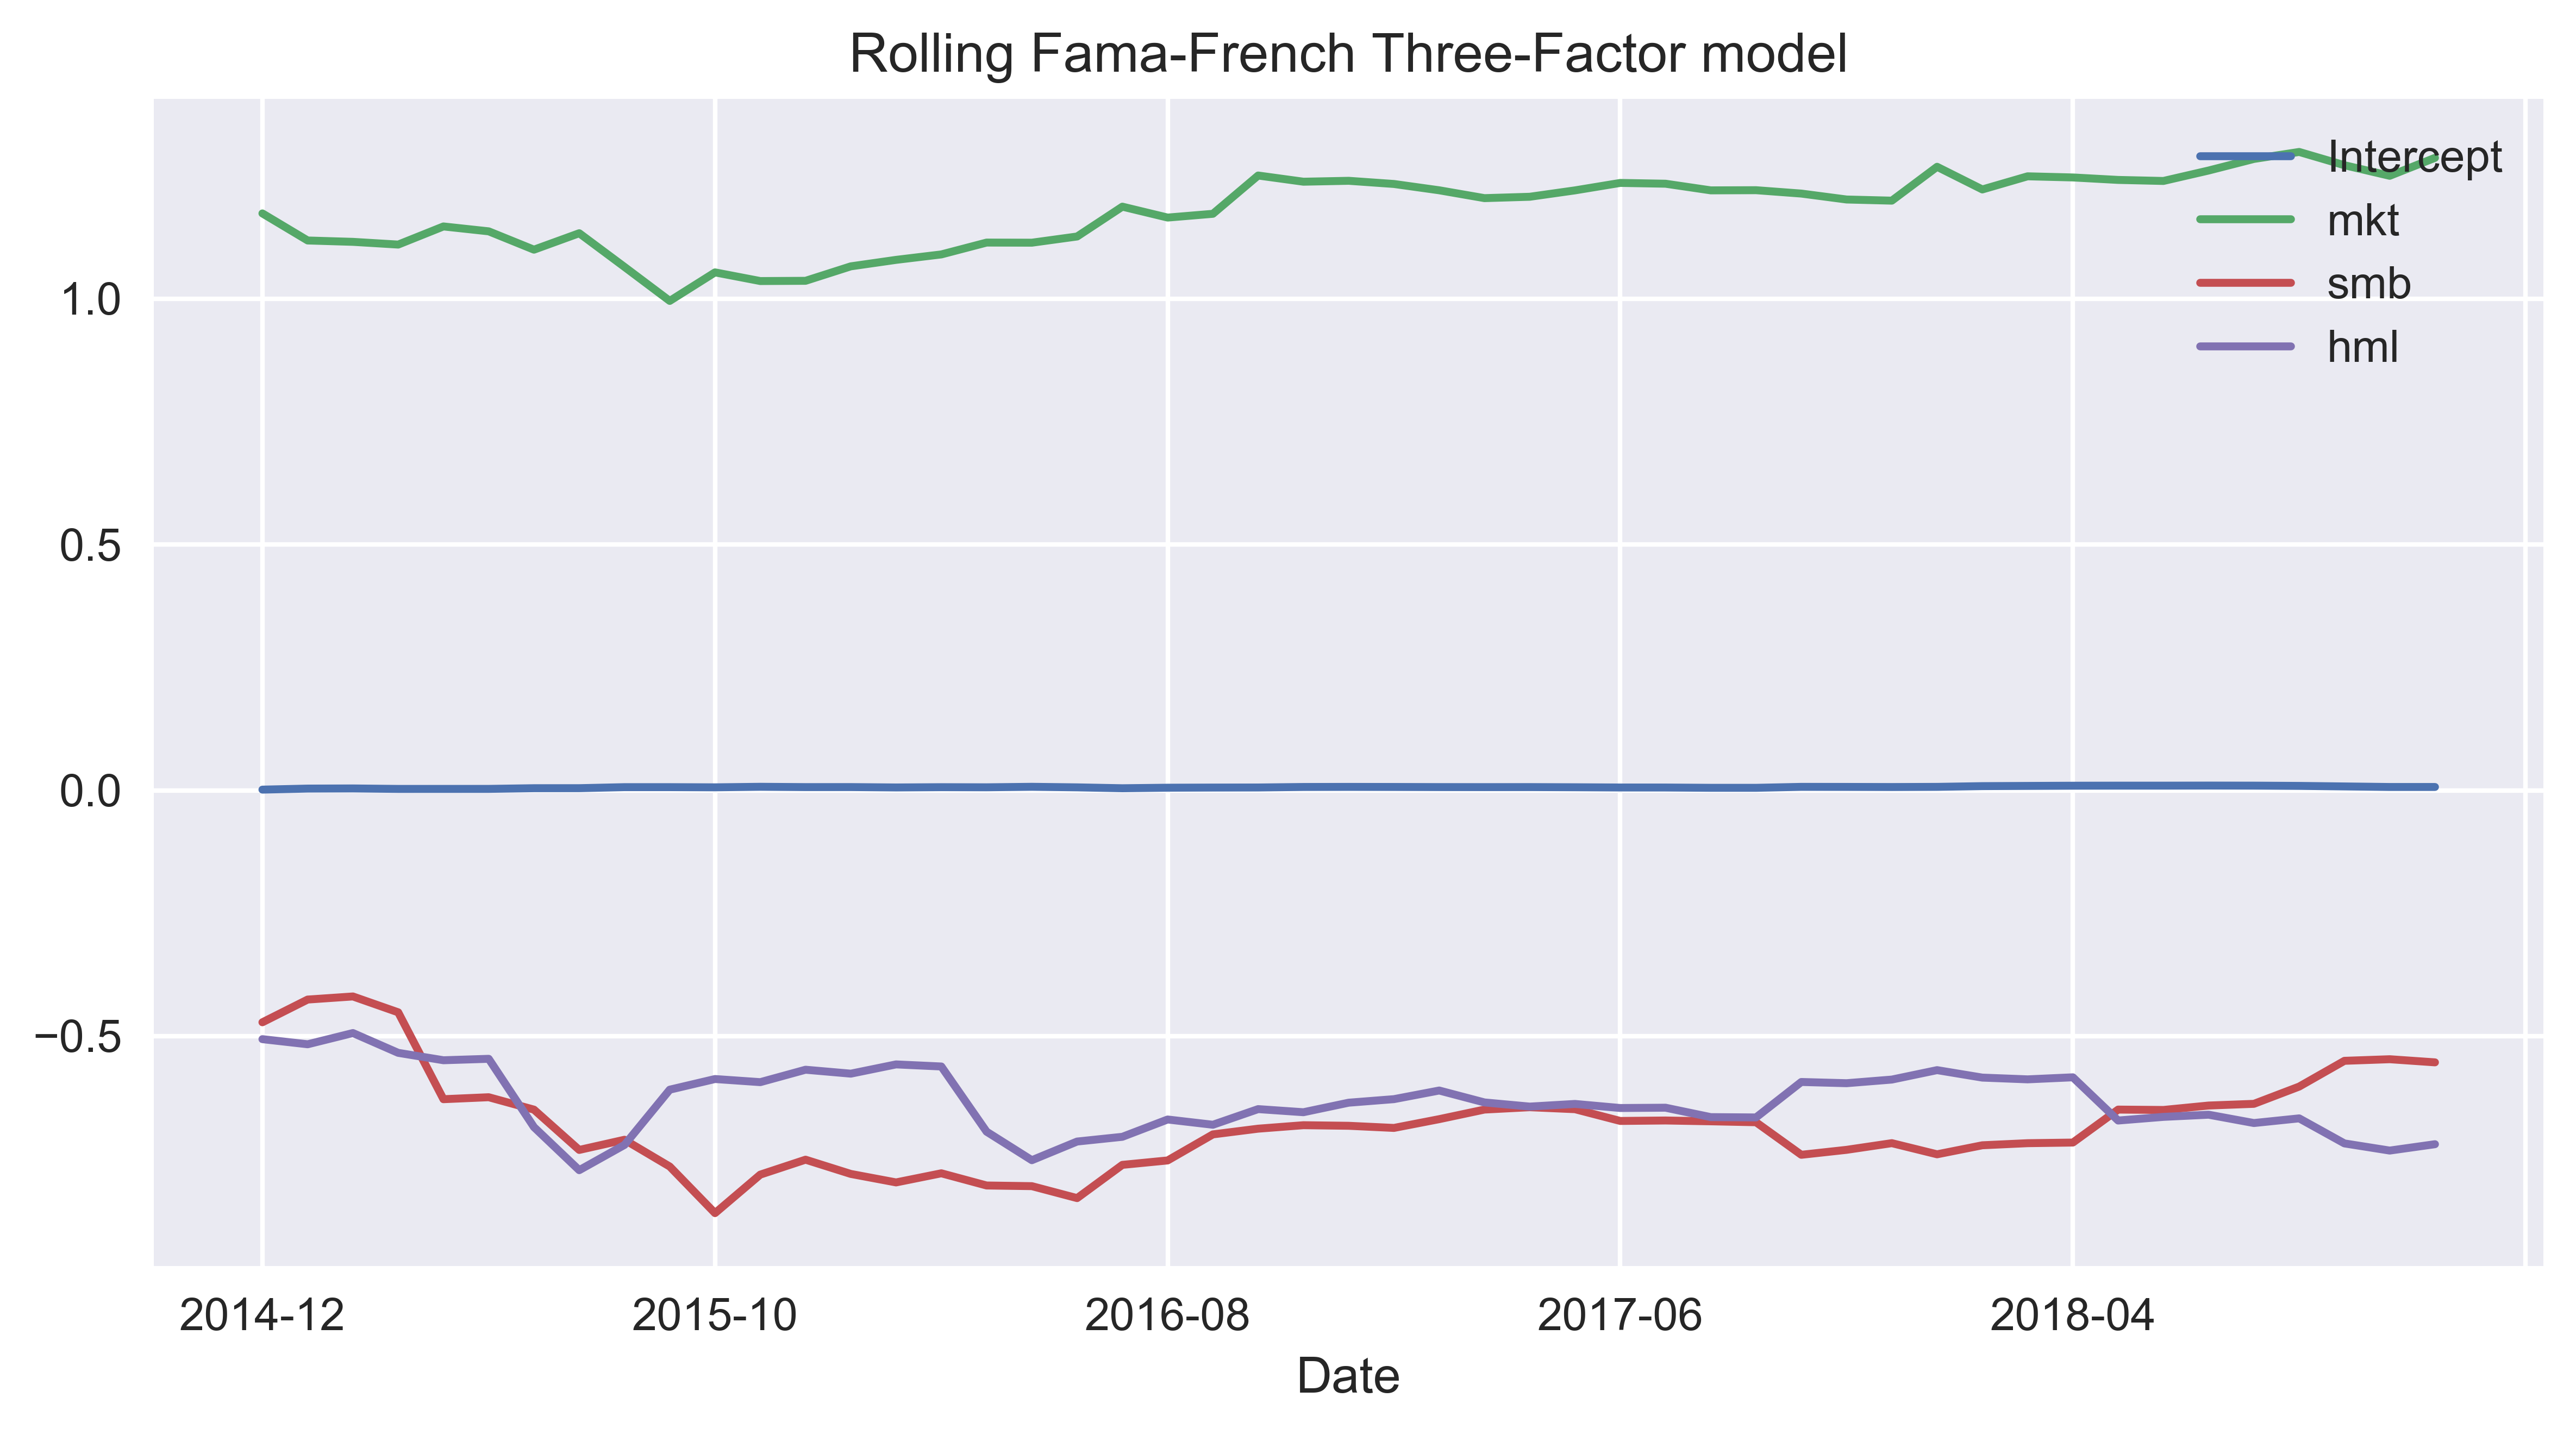

In [73]:
MODEL_FORMULA = 'portf_ex_rtn ~ mkt + smb + hml'
results_df = rolling_factor_model(ff_data, 
                                  MODEL_FORMULA, 
                                  window_size=60)
results_df.plot(title = 'Rolling Fama-French Three-Factor model')

plt.tight_layout()
# plt.savefig('images/ch4_im8.png')
plt.show()

## Implementing the four- and five-factor models in Python

### How to do it...

1. Import the libraries:

In [74]:
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf
import pandas_datareader.data as web

2. Specify the risky asset and the time horizon:

In [75]:
RISKY_ASSET = 'AMZN'
START_DATE = '2013-12-31'
END_DATE = '2018-12-31'

3. Download the risk factors from prof. French's website:

In [76]:
# three factors 
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                                 start=START_DATE)[0]
df_three_factor.index = df_three_factor.index.format()

# momentum factor
df_mom = web.DataReader('F-F_Momentum_Factor', 'famafrench', 
                        start=START_DATE)[0]
df_mom.index = df_mom.index.format()

# five factors
df_five_factor = web.DataReader('F-F_Research_Data_5_Factors_2x3', 
                                'famafrench', 
                                start=START_DATE)[0]
df_five_factor.index = df_five_factor.index.format()

4. Download the data of the risky asset from Yahoo Finance:

In [78]:
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')

Downloaded 1258 rows of data.


5. Calculate monthly returns:

In [79]:
y = asset_df['Adj Close'].resample('M') \
                         .last() \
                         .pct_change() \
                         .dropna()

y.index = y.index.strftime('%Y-%m')
y.name = 'return'

6. Merge the datasets for the four-factor models:

incluye momentum. Este factor indica el exceso de return de los ganadores sobre los perdedores pasados los 12 meses 

In [80]:
# join all datasets on the index
four_factor_data = df_three_factor.join(df_mom).join(y)

# rename columns
four_factor_data.columns = ['mkt', 'smb', 'hml', 'rf', 'mom', 'rtn']

# divide everything (except returns) by 100
four_factor_data.loc[:, four_factor_data.columns != 'rtn'] /= 100

# convert index to datetime
four_factor_data.index = [pd.to_datetime(x, format='%Y-%m') for x in four_factor_data.index]

# select period of interest
four_factor_data = four_factor_data.loc[START_DATE:END_DATE]

# calculate excess returns
four_factor_data['excess_rtn'] = four_factor_data.rtn - four_factor_data.rf

four_factor_data.head()

,mkt,smb,hml,rf,mom,rtn,excess_rtn
2014-01-01,-0.0332,0.0090,-0.0207,0.0,0.0171,-0.100554,-0.100554
2014-02-01,0.0465,0.0037,-0.0031,0.0,0.0207,0.009507,0.009507
2014-03-01,0.0043,-0.0185,0.0493,0.0,-0.0329,-0.071058,-0.071058
2014-04-01,-0.0019,-0.0420,0.0117,0.0,-0.0389,-0.095847,-0.095847
2014-05-01,0.0206,-0.0188,-0.0013,0.0,0.0087,0.027685,0.027685


7. Merge the datasets for the five-factor models:

In [81]:
# join all datasets on the index
five_factor_data = df_five_factor.join(y)

# rename columns
five_factor_data.columns = ['mkt', 'smb', 'hml', 'rmw', 'cma', 'rf', 'rtn']

# divide everything (except returns) by 100
five_factor_data.loc[:, five_factor_data.columns != 'rtn'] /= 100

# convert index to datetime
five_factor_data.index = [pd.to_datetime(x, format='%Y-%m') for x in five_factor_data.index]

# select period of interest
five_factor_data = five_factor_data.loc[START_DATE:END_DATE]

# calculate excess returns
five_factor_data['excess_rtn'] = five_factor_data.rtn - five_factor_data.rf

five_factor_data.head()

,mkt,smb,hml,rmw,cma,rf,rtn,excess_rtn
2014-01-01,-0.0332,0.0058,-0.0207,-0.0388,-0.0143,0.0,-0.100554,-0.100554
2014-02-01,0.0465,0.0016,-0.0031,-0.0023,-0.0047,0.0,0.009507,0.009507
2014-03-01,0.0043,-0.0113,0.0493,0.0213,0.0198,0.0,-0.071058,-0.071058
2014-04-01,-0.0019,-0.0414,0.0117,0.0348,0.0104,0.0,-0.095847,-0.095847
2014-05-01,0.0206,-0.0189,-0.0013,0.0005,-0.0101,0.0,0.027685,0.027685


8. Estimate the four-factor model:

In [48]:
four_factor_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml + mom', 
                            data=four_factor_data).fit()

print(four_factor_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     16.77
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           4.82e-09
Time:                        21:31:16   Log-Likelihood:                 86.244
No. Observations:                  60   AIC:                            -162.5
Df Residuals:                      55   BIC:                            -152.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0094      0.008      1.164      0.2

9. Estimate the five-factor model:

Incluímos:
    -Robus minus weak (RMW)
    - Conservative Mnus Aggressive (CMA)

In [84]:
five_factor_model = smf.ols(
    formula='excess_rtn ~ mkt + smb + hml + rmw + cma', 
    data=five_factor_data
).fit()

print(five_factor_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     16.00
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.18e-09
Time:                        16:22:09   Log-Likelihood:                 89.592
No. Observations:                  60   AIC:                            -167.2
Df Residuals:                      54   BIC:                            -154.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0099      0.008      1.295      0.2

Según esto, los excesos de retorno de Amazon están negativamente expuestos a la mayoría  de factores (expcepto el mercsdo) 